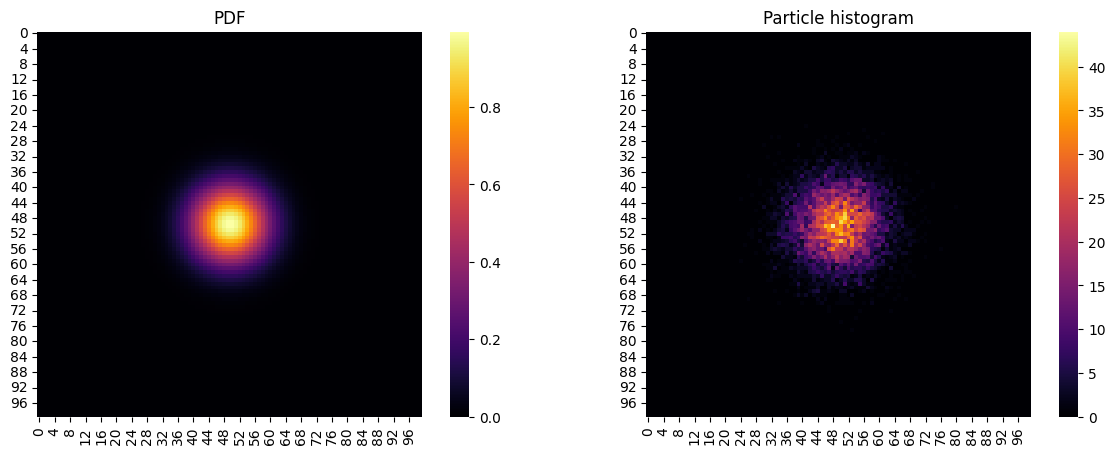

In [1]:
# Lets start by creating a PDF image

from nanopyx.core.particles.simulate_particle_field import simulate_particle_field_based_on_2D_PDF, render_particle_histogram, render_particle_histogram_with_tracks
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
image_pdf = np.exp(-(X - 0.5)**2 / 0.1**2 - (Y - 0.5)**2 / 0.1**2)
image_pdf = image_pdf.astype(np.float32)

# Simulate the particle field
particle_field = simulate_particle_field_based_on_2D_PDF(
    image_pdf, min_particles=100, max_particles=10000)
image_particle_field = render_particle_histogram(particle_field, 100, 100)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# Create the first heatmap
sns.heatmap(image_pdf, cmap='inferno', square=True, ax=ax1)
ax1.set_title("PDF")
# Create the second heatmap
sns.heatmap(image_particle_field, cmap='inferno', square=True, ax=ax2)
ax2.set_title("Particle histogram")
# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1)
# Display the figure
plt.show()


<AxesSubplot: >

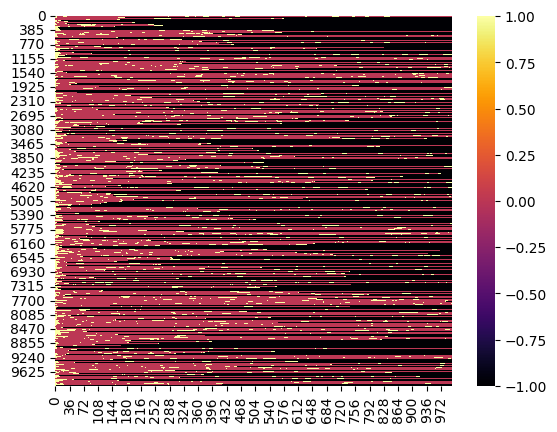

In [2]:
# Now lets render the time tracks of the particles

from nanopyx.core.particles.simulate_photoswitching_time_tracks import simple_state_transition_model

# Define the parameters
n_particles = particle_field.shape[0]
n_steps = 1000
p_on = 0.01
p_transient_off = 0.1
p_permanent_off = 0.01

# Simulate the particle field
particle_tracks = simple_state_transition_model(n_particles, n_steps, p_on, p_transient_off, p_permanent_off, 1)

sns.heatmap(particle_tracks, cmap='inferno', square=False)


In [5]:

# Render the particle tracks as a movie

image_stack = render_particle_histogram_with_tracks(particle_field, particle_tracks, 100, 100)

do_movie = False
# stackview is fast, celluloid is slow

import stackview
stackview.slice(image_stack, continuous_update=True, zoom_factor=4, zoom_spline_order=0)

# if do_movie:
#     from celluloid import Camera
#     from IPython.display import HTML

#     fig, ax = plt.subplots() # make it bigger
#     camera = Camera(fig)
#     for i in range(image_stack.shape[0]):
#         ax.imshow(image_stack[i], cmap='inferno')
#         camera.snap()
#     animation = camera.animate()
#     HTML(animation.to_html5_video())